# RDKit [TUTORIAL](https://www.rdkit.org/docs/GettingStartedInPython.html)


## What is this

This document is intended to provide an overview of how one can use the RDKit functionality from Python. It’s not comprehensive and it’s not a manual.

If you find mistakes, or have suggestions for improvements, please either fix them yourselves in the source document (the .rst file) or send them to the mailing list: rdkit-devel@lists.sourceforge.net In particular, if you find yourself spending time working out how to do something that doesn’t appear to be documented please contribute by writing it up for this document. Contributing to the documentation is a great service both to the RDKit community and to your future self.

## Reading and Writing Molecules

### Reading single molecules

In [190]:
from rdkit import Chem

Individual molecules can be read in different ways: 

In [191]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m = Chem.MolFromMolFile('data/input.mol')
stringWithMolData=open('data/input.mol','r').read()
m = Chem.MolFromMolBlock(stringWithMolData)


All these functions return a rdkit.Chem.rdchem.Mol object ! If it failed it will return `None`.

In [192]:
print(m)
m = Chem.MolFromMolFile('data/invalid.mol')
print(m)
print(m is None)

None
True


RDKit ERROR: [15:03:39] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 317 in file /home/conda/feedstock_root/build_artifacts/rdkit_1646569069773/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [15:03:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Range Error
RDKit ERROR: idx
RDKit ERROR: Violation occurred on line 317 in file /home/conda/feedstock_root/build_artifacts/rdkit_1646569069773/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: 9 < 7
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [15:04:12] Explicit valence for atom # 6 N, 4, is greater than permitted
[15:03:39] 

****
Range Error
idx
Violation occurred on line 317 in file /home/conda/feedstock_root/build_artifacts/rdkit_1646569069773/work/Code/GraphMol/ROMol.cpp
Failed Expression: 9 < 7
****

[15:03:48] 

****
Range Error
idx
Violation occurred on line 317 in file /home/conda/feedsto

### Reading sets of molecules

In [193]:
suppl = Chem.SDMolSupplier('data/5ht3ligs.sdf')
for mol in suppl:
    print(mol.GetNumAtoms() )

20
24
24
26


We can create lists of molecules or retrieve the molecules from the object itself:

In [194]:
mols = [x for x in suppl]
print(len(mols))
print(suppl[0].GetNumAtoms())

4
20


Good practice is to test each molecule to see if it was correctly read before working with it:

In [195]:
with Chem.SDMolSupplier('data/5ht3ligs.sdf') as suppl:
    for mol in suppl:
        if mol is None: continue
        print(mol.GetNumAtoms())

20
24
24
26


An alternative to read from file like objects is `Chem.ForwardSDMolSupplier`. A limitation is that it cannot be used to random-access objects:

In [196]:
# Alternative
inf = open('data/5ht3ligs.sdf','rb')
with Chem.ForwardSDMolSupplier(inf) as fsuppl:
   for mol in fsuppl:
     if mol is None: continue
     print(mol.GetNumAtoms())

# Alternative
import gzip
inf = gzip.open('data/actives_5ht3.sdf.gz')
with Chem.ForwardSDMolSupplier(inf) as gzsuppl:
   ms = [x for x in gzsuppl if x is not None]
len(ms)

20
24
24
26


180

In [197]:
inf = open('data/5ht3ligs.sdf','rb')
with Chem.ForwardSDMolSupplier(inf) as fsuppl:
    try:
        fsuppl[0]
    except:
        print("Exception ! ! !")

Exception ! ! !


For reading Smiles or SDF files with large number of records concurrently, MultithreadedMolSuppliers can be used like this:

In [198]:
i = 0
with Chem.MultithreadedSDMolSupplier('data/5ht3ligs.sdf') as sdSupl:
    for mol in sdSupl:
        if mol is not None:
            i += 1

print(i)

4


By default a single reader thread is used to extract records from the file and a single writer thread is used to process them. Note that due to multithreading the output may not be in the expected order. Furthermore, the MultithreadedSmilesMolSupplier and the MultithreadedSDMolSupplier cannot be used as random-access objects.

### Writing molecules

Single molecules can be converted to text using several functions present in the rdkit.Chem module.

For example, for SMILES:

In [199]:
m = Chem.MolFromMolFile('data/chiral.mol')
print(Chem.MolToSmiles(m))
print(Chem.MolToSmiles(m,isomericSmiles=False))


C[C@H](O)c1ccccc1
CC(O)c1ccccc1


Note that the SMILES provided is canonical, so the output should be the same no matter how a particular molecule is input:

In [200]:
print( Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1')) )
print( Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1')) )
print( Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1')) )


c1ccncc1
c1ccncc1
c1ccncc1


If you’d like to have the Kekule form of the SMILES, first Kekulize the molecule, then use the `kekuleSmiles` option:

In [201]:
print( Chem.Kekulize(m) )
print( Chem.MolToSmiles(m,kekuleSmiles=True) )

None
C[C@H](O)C1=CC=CC=C1


Note: as of this writing (Aug 2008), the smiles provided when one requests kekuleSmiles are not canonical. The limitation is not in the SMILES generation, but in the kekulization itself.

MDL Mol blocks are also available:

In [202]:
m2 = Chem.MolFromSmiles('C1CCC1')
print( Chem.MolToMolBlock(m2) ) 


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



To include names in the mol blocks, set the molecule's `_Name` property:

In [203]:
m2.SetProp("_Name","cyclobutane")
print(Chem.MolToMolBlock(m2))    

cyclobutane
     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



In order for atom or bond stereochemistry to be recognised correctly by most software, it’s essential that the mol block have atomic coordinates. It’s also convenient for many reasons, such as drawing the molecules. Generating a mol block for a molecule that does not have coordinates will, by default, automatically cause coordinates to be generated. These are not, however, stored with the molecule. Coordinates can be generated and stored with the molecule using functionality in the `rdkit.Chem.AllChem` module (see the Chem vs AllChem section for more information).

You can either include 2D coordinates (i.e. a depiction):

In [204]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(m2)
print(Chem.MolToMolBlock(m2)) 

cyclobutane
     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



Or you can add 3D coordinates by embedding the molecule (this uses the ETKDG method, which is described in more detail below). Note that we add Hs to the molecule before generating the conformer. This is essential to get good structures:

In [205]:
m3 = Chem.AddHs(m2)
AllChem.EmbedMolecule(m3,randomSeed=0xf00d)   # optional random seed for reproducibility)
print(Chem.MolToMolBlock(m3))    

cyclobutane
     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    1.0256    0.2491   -0.0964 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2041    0.9236    0.4320 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0435   -0.2466   -0.0266 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2104   -0.9922   -0.3417 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4182    0.7667   -0.9782 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8181    0.1486    0.6820 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1697    1.0826    1.5236 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5336    1.8391   -0.1051 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6809   -0.0600   -0.8987 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6501   -0.6194    0.8220 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.4659   -1.7768    0.3858 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3439   -1.3147   -1.3988 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
  1  5  1  0
  1  6  1  0
  2  7

If we don’t want the Hs in our later analysis, they are easy to remove:

In [206]:
m3 = Chem.RemoveHs(m3)
print(Chem.MolToMolBlock(m3))  

cyclobutane
     RDKit          3D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0256    0.2491   -0.0964 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2041    0.9236    0.4320 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0435   -0.2466   -0.0266 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2104   -0.9922   -0.3417 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



If you’d like to write the molecule to a file, use Python file objects:

In [207]:
print(Chem.MolToMolBlock(m2),file=open('data/foo.mol','w+'))

### Writing sets of molecules

Multiple molecules can be written to a file using an rdkit.Chem.`rdmolfiles.SDWriter` object:

In [208]:
with Chem.SDWriter('data/foo.sdf') as w:
    for m in mols:
        w.write(m)

An SDWriter can also be initialized using a file-like object:

In [209]:
from rdkit.six import StringIO
sio = StringIO()
with Chem.SDWriter(sio) as w:
    for m in mols:
        w.write(m)
print(sio.getvalue())

mol-295
     RDKit          3D

 20 22  0  0  1  0  0  0  0  0999 V2000
    2.3200    0.0800   -0.1000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8400   -1.2200    0.1200 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6800    0.0800    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7400    1.2800   -0.5600 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9400   -1.9200    0.6000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5400   -1.7400   -0.0800 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0200   -1.1400    0.6600 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.4600    1.2600    0.1600 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5200    2.4600   -0.6600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3800   -1.0400   -0.5000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3000   -2.9200    0.1800 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.8800    2.4400   -0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6800   -1.2400   -0.7800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5800   -0.32

Other available Writers include the
* `rdkit.Chem.rdmolfiles.SmilesWriter` and the 
* `rdkit.Chem.rdmolfiles.TDTWriter`.

## Working with Molecules

### Looping over Atoms and Bonds

Once you have a molecule, it’s easy to loop over its atoms and bonds:

In [210]:
m = Chem.MolFromSmiles('C1OC1')
for atom in m.GetAtoms():
    print(atom.GetAtomicNum())

print(m.GetBonds()[0].GetBondType())

6
8
6
SINGLE


You can also request individual bonds or atoms:

In [211]:
print( m.GetAtomWithIdx(0).GetSymbol() )
print( m.GetAtomWithIdx(0).GetExplicitValence() )
print( m.GetBondWithIdx(0).GetBeginAtomIdx() )
print( m.GetBondWithIdx(0).GetEndAtomIdx() )
print( m.GetBondBetweenAtoms(0,1).GetBondType() )

C
2
0
1
SINGLE


Atoms keep track of their neighbors:

In [212]:
atom = m.GetAtomWithIdx(0)
[x.GetAtomicNum() for x in atom.GetNeighbors()]
print( len(atom.GetNeighbors()[-1].GetBonds()) )

2


### Ring Information

Atoms and bonds both carry information about the molecule’s rings:

In [213]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
print( m.GetAtomWithIdx(0).IsInRing() )
print( m.GetAtomWithIdx(1).IsInRing() )
print( m.GetAtomWithIdx(2).IsInRingSize(3) )
print( m.GetAtomWithIdx(2).IsInRingSize(4) )
print( m.GetAtomWithIdx(2).IsInRingSize(5) )
print( m.GetBondWithIdx(1).IsInRingSize(3) ) 
print( m.GetBondWithIdx(1).IsInRing() )

False
True
True
True
False
True
True


But note that the information is only about the smallest rings:

In [214]:
m.GetAtomWithIdx(1).IsInRingSize(5)

False

More detail about the smallest set of smallest rings (SSSR) is available:

In [215]:
ssr = Chem.GetSymmSSSR(m)
print(len(ssr))
print(list(ssr[0]))
print(list(ssr[1]))

2
[1, 2, 3]
[4, 5, 2, 3]


As the name indicates, this is a symmetrized SSSR; if you are interested in the number of "true" SSSR, use the GetSSSR function.

In [216]:
Chem.GetSSSR(m)

2

The distinction between symmetrized and non-symmetrized SSSR is discussed in more detail below in the section The SSSR Problem.

For more efficient queries about a molecule’s ring systems (avoiding repeated calls to Mol.GetAtomWithIdx), use the `rdkit.Chem.rdchem.RingInfo` class:

In [217]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
ri = m.GetRingInfo()
print( ri.NumAtomRings(0) )
print( ri.NumAtomRings(1) )
print( ri.NumAtomRings(2) )
print( ri.IsAtomInRingOfSize(1,3) )
print( ri.IsBondInRingOfSize(1,3) )

0
1
2
True
True


### Modifying molecules

Normally molecules are stored in the RDKit with the hydrogen atoms implicit (e.g. not explicitly present in the molecular graph. When it is useful to have the hydrogens explicitly present, for example when generating or optimizing the 3D geometry, the :py:func:rdkit.Chem.rdmolops.AddHs function can be used:

In [218]:
m=Chem.MolFromSmiles('CCO')
print( m.GetNumAtoms() )
m2 = Chem.AddHs(m)
print( m2.GetNumAtoms() )

3
9


The Hs can be removed again using the `rdkit.Chem.rdmolops.RemoveHs()` function:

In [219]:
m3 = Chem.RemoveHs(m2)
print( m3.GetNumAtoms() )

3


RDKit molecules are usually stored with the bonds in aromatic rings having aromatic bond types. This can be changed with the `rdkit.Chem.rdmolops.Kekulize()` function:

In [220]:
m = Chem.MolFromSmiles('c1ccccc1')
print( m.GetBondWithIdx(0).GetBondType() )
print( Chem.rdmolops.Kekulize(m) )
print( m.GetBondWithIdx(0).GetBondType() )
print( m.GetBondWithIdx(1).GetBondType() )

AROMATIC
None
DOUBLE
SINGLE


By default, the bonds are still marked as being aromatic:

In [221]:
print( m.GetBondWithIdx(1).GetIsAromatic() )

True


because the flags in the original molecule are not cleared (clearAromaticFlags defaults to False). You can explicitly force or decline a clearing of the flags:

In [222]:
m = Chem.MolFromSmiles('c1ccccc1')
print( m.GetBondWithIdx(0).GetIsAromatic() )

m1 = Chem.MolFromSmiles('c1ccccc1')
Chem.rdmolops.Kekulize(m1, clearAromaticFlags=True)
print( m1.GetBondWithIdx(0).GetIsAromatic() )

True
False


Bonds can be restored to the aromatic bond type using the `rdkit.Chem.rdmolops.SanitizeMol()` function:

In [223]:
print( Chem.SanitizeMol(m) )
print( m.GetBondWithIdx(0).GetBondType() )

SANITIZE_NONE
AROMATIC


The value returned by SanitizeMol() indicates that no problems were encountered.

### Working with 2D molecules: Generating Depictions

The RDKit has a library for generating depictions (sets of 2D) coordinates for molecules. This library, which is part of the AllChem module, is accessed using the `rdkit.Chem.rdDepictor.Compute2DCoords()` function:

In [224]:
m = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(m)

0

The 2D conformer is constructed in a canonical orientation and is built to minimize intramolecular clashes, i.e. to maximize the clarity of the drawing.

If you have a set of molecules that share a common template and you’d like to align them to that template, you can do so as follows:

0


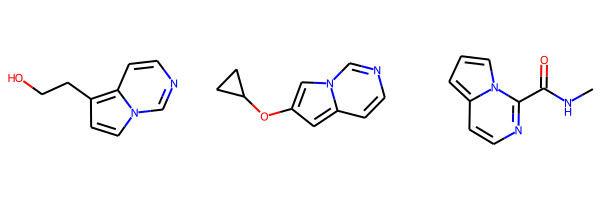

In [225]:
template = Chem.MolFromSmiles('c1nccc2n1ccc2')
print( AllChem.Compute2DCoords(template) )

ms = [Chem.MolFromSmiles(smi) for smi in ('OCCc1ccn2cnccc12','C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12')]

from rdkit.Chem import Draw
Draw.MolsToGridImage(ms)

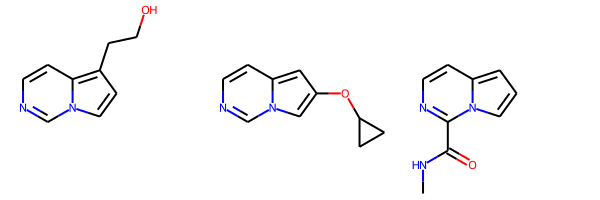

In [226]:
for m in ms:
    #_ = AllChem.GenerateDepictionMatching2DStructure(m,template)
    AllChem.GenerateDepictionMatching2DStructure(m,template)

Draw.MolsToGridImage(ms)

Another option for Compute2DCoords allows you to generate 2D depictions for molecules that closely mimic 3D conformers. This is available using the function `rdkit.Chem.AllChem.GenerateDepictionMatching3DStructure()`.

More fine-grained control can be obtained using the core function `rdkit.Chem.rdDepictor.Compute2DCoordsMimicDistmat()`, but that is beyond the scope of this document. See the implementation of GenerateDepictionMatching3DStructure in AllChem.py for an example of how it is used.

### Working with 3D Molecules

The RDKit can generate conformers for molecules using two different methods. The original method used distance geometry. The algorithm followed is:

1. The molecule’s distance bounds matrix is calculated based on the connection table and a set of rules.

2. The bounds matrix is smoothed using a triangle-bounds smoothing algorithm.

3. A random distance matrix that satisfies the bounds matrix is generated.

4. This distance matrix is embedded in 3D dimensions (producing coordinates for each atom).

5. The resulting coordinates are cleaned up somewhat using a crude force field and the bounds matrix.

Note that the conformers that result from this procedure tend to be fairly ugly. They should be cleaned up using a force field. This can be done within the RDKit using its implementation of the Universal Force Field (UFF).

More recently, there is an implementation of the ETKDG method of Riniker and Landrum which uses torsion angle preferences from the Cambridge Structural Database (CSD) to correct the conformers after distance geometry has been used to generate them. With this method, there should be no need to use a minimisation step to clean up the structures.

More detailed information about the conformer generator and the parameters controlling it can be found in the “RDKit Book”.

Since the 2018.09 release of the RDKit, ETKDG is the default conformer generation method.

The full process of embedding a molecule is easier than all the above verbiage makes it sound:

In [227]:
m2=Chem.AddHs(m)
AllChem.EmbedMolecule(m2)

0

The RDKit also has an implementation of the MMFF94 force field available. Please note that the MMFF atom typing code uses its own aromaticity model, so the aromaticity flags of the molecule will be modified after calling MMFF-related methods.

Here’s an example of using MMFF94 to minimize an RDKit-generated conformer: .. doctest:

In [228]:
m = Chem.MolFromSmiles('C1CCC1OC')
m2=Chem.AddHs(m)
print( AllChem.EmbedMolecule(m2) )
print( AllChem.MMFFOptimizeMolecule(m2) )

0
0


Note the calls to Chem.AddHs() in the examples above. By default RDKit molecules do not have H atoms explicitly present in the graph, but they are important for getting realistic geometries, so they generally should be added. They can always be removed afterwards if necessary with a call to Chem.RemoveHs().

With the RDKit, multiple conformers can also be generated using the different embedding methods. In both cases this is simply a matter of running the distance geometry calculation multiple times from different random start points. The option numConfs allows the user to set the number of conformers that should be generated. Otherwise the procedures are as before. The conformers so generated can be aligned to each other and the RMS values calculated.

In [229]:
m = Chem.MolFromSmiles('C1CCC1OC')
m2=Chem.AddHs(m)
# run ETKDG 10 times
cids = AllChem.EmbedMultipleConfs(m2, numConfs=10)
print(len(cids))

rmslist = []
AllChem.AlignMolConformers(m2, RMSlist=rmslist)
print(len(rmslist))

10
9


rmslist contains the RMS values between the first conformer and all others. The RMS between two specific conformers (e.g. 1 and 9) can also be calculated. The flag prealigned lets the user specify if the conformers are already aligned (by default, the function aligns them).

In [230]:
rms = AllChem.GetConformerRMS(m2, 1, 9, prealigned=True)

If you are interested in running MMFF94 on a molecule’s conformers (note that this is often not necessary when using ETKDG), there’s a convenience function available:

In [231]:
res = AllChem.MMFFOptimizeMoleculeConfs(m2)

The result is a list a containing 2-tuples: (not_converged, energy) for each conformer. If not_converged is 0, the minimization for that conformer converged.

By default AllChem.EmbedMultipleConfs and AllChem.MMFFOptimizeMoleculeConfs() run single threaded, but you can cause them to use multiple threads simultaneously for these embarassingly parallel tasks via the numThreads argument:

In [232]:
cids = AllChem.EmbedMultipleConfs(m2, numThreads=0)
res = AllChem.MMFFOptimizeMoleculeConfs(m2, numThreads=0)

Setting numThreads to zero causes the software to use the maximum number of threads allowed on your computer.

Disclaimer/Warning: Conformer generation is a difficult and subtle task. The plain distance-geometry 2D->3D conversion provided with the RDKit is not intended to be a replacement for a “real” conformer analysis tool; it merely provides quick 3D structures for cases when they are required. We believe, however, that the newer ETKDG method 18 is suitable for most purposes.

### Preserving Molecules

Molecules can be converted to and from text using Python’s pickling machinery:

In [233]:
m = Chem.MolFromSmiles('c1ccncc1')
import pickle
pkl = pickle.dumps(m)
m2=pickle.loads(pkl)
Chem.MolToSmiles(m2)

'c1ccncc1'

The RDKit pickle format is fairly compact and it is much, much faster to build a molecule from a pickle than from a Mol file or SMILES string, so storing molecules you will be working with repeatedly as pickles can be a good idea.

The raw binary data that is encapsulated in a pickle can also be directly obtained from a molecule:

In [234]:
binStr = m.ToBinary()

This can be used to reconstruct molecules using the Chem.Mol constructor:

In [235]:
m2 = Chem.Mol(binStr)
Chem.MolToSmiles(m2)

len(binStr)

127

Note that this is smaller than the pickle:

In [236]:
len(binStr) < len(pkl)

True

The small overhead associated with python’s pickling machinery normally doesn’t end up making much of a difference for collections of larger molecules (the extra data associated with the pickle is independent of the size of the molecule, while the binary string increases in length as the molecule gets larger).

Tip: The performance difference associated with storing molecules in a pickled form on disk instead of constantly reparsing an SD file or SMILES table is difficult to overstate. In a test I just ran on my laptop, loading a set of 699 drug-like molecules from an SD file took 10.8 seconds; loading the same molecules from a pickle file took 0.7 seconds. The pickle file is also smaller – 1/3 the size of the SD file – but this difference is not always so dramatic (it’s a particularly fat SD file).

### Drawing Molecules

The RDKit has some built-in functionality for creating images from molecules found in the rdkit.Chem.Draw package:

In [237]:
with Chem.SDMolSupplier('data/cdk2.sdf') as suppl:
    ms = [x for x in suppl if x is not None]
for m in ms: tmp=AllChem.Compute2DCoords(m)
from rdkit.Chem import Draw
Draw.MolToFile(ms[0],'images/cdk2_mol1.o.png')    
Draw.MolToFile(ms[1],'images/cdk2_mol2.o.png')   

It’s also possible to produce an image grid out of a set of molecules:

In [238]:
img=Draw.MolsToGridImage(ms[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in ms[:8]],returnPNG=False)    

This returns a PIL image, which can then be saved to a file:

In [239]:
img.save('images/cdk2_molgrid.o.png')    

These would of course look better if the common core were aligned. This is easy enough to do:

In [240]:
p = Chem.MolFromSmiles('[nH]1cnc2cncnc21')
subms = [x for x in ms if x.HasSubstructMatch(p)]
len(subms)

AllChem.Compute2DCoords(p)

for m in subms:
    _ = AllChem.GenerateDepictionMatching2DStructure(m,p)
img=Draw.MolsToGridImage(subms,molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in subms],returnPNG=False)    
img.save('images/cdk2_molgrid.aligned.o.png') 

Atoms in a molecule can be highlighted by drawing a coloured solid or open circle around them, and bonds likewise can have a coloured outline applied. An obvious use is to show atoms and bonds that have matched a substructure query

In [241]:
from rdkit.Chem.Draw import rdMolDraw2D
smi = 'c1cc(F)ccc1Cl'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('ClccccF')
hit_ats = list(mol.GetSubstructMatch(patt))
hit_bonds = []
for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())
d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                    highlightBonds=hit_bonds)


It is possible to specify the colours for individual atoms and bonds:

In [242]:
colours = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]
atom_cols = {}
for i, at in enumerate(hit_ats):
    atom_cols[at] = colours[i%4]
bond_cols = {}
for i, bd in enumerate(hit_bonds):
    bond_cols[bd] = colours[3 - i%4]
d = rdMolDraw2D.MolDraw2DCairo(500, 500)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                   highlightAtomColors=atom_cols,
                                   highlightBonds=hit_bonds,
                                   highlightBondColors=bond_cols)

Atoms and bonds can also be highlighted with multiple colours if they fall into multiple sets, for example if they are matched by more than 1 substructure pattern. This is too complicated to show in this simple introduction, but there is an example in data/test_multi_colours.py, which produces the somewhat garish

As of version 2020.03, it is possible to add arbitrary small strings to annotate atoms and bonds in the drawing. The strings are added as properties `atomNote` and `bondNote` and they will be placed automatically close to the atom or bond in question in a manner intended to minimise their clash with the rest of the drawing. For convenience, here are 3 flags in `MolDraw2DOptions` that will add stereo information (R/S to atoms, E/Z to bonds) and atom and bond sequence numbers.

In [243]:
mol = Chem.MolFromSmiles('Cl[C@H](F)NC\C=C\C')
d = rdMolDraw2D.MolDraw2DCairo(250, 200) # or MolDraw2DSVG to get SVGs
mol.GetAtomWithIdx(2).SetProp('atomNote', 'foo')
mol.GetBondWithIdx(0).SetProp('bondNote', 'bar')
d.drawOptions().addStereoAnnotation = True
d.drawOptions().addAtomIndices = True
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('atom_annotation_1.png') 

If atoms have an `atomLabel` property set, this will be used when drawing them:

In [244]:
smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|'
mol = Chem.MolFromSmiles(smi)
mol.GetAtomWithIdx(3).GetProp("atomLabel")

mol.GetAtomWithIdx(7).GetProp("atomLabel")
'R2'
d = rdMolDraw2D.MolDraw2DCairo(250, 250)
rdMolDraw2D.PrepareAndDrawMolecule(d,mol)
d.WriteDrawingText("./images/atom_labels_1.png")  

Since the `atomLabel` property is also used for other things (for example in CXSMILES as demonstrated), if you want to provide your own atom labels, it’s better to use the `_displayLabel` property:

In [245]:
smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|'
mol = Chem.MolFromSmiles(smi)
mol.GetAtomWithIdx(3).SetProp("_displayLabel","R<sub>1</sub>")
mol.GetAtomWithIdx(7).SetProp("_displayLabel","R<sub>2</sub>")
d = rdMolDraw2D.MolDraw2DCairo(250, 250)
rdMolDraw2D.PrepareAndDrawMolecule(d,mol)
d.WriteDrawingText("./images/atom_labels_2.png")   

Note that you can use `<sup>` and `<sub>` in these labels to provide super- and subscripts.

Finally, if you have atom labels which should be displayed differently when the bond comes into them from the right (the West), you can also set the _displayLabelW property:

In [246]:
smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|'
mol = Chem.MolFromSmiles(smi)
mol.GetAtomWithIdx(3).SetProp("_displayLabel","CO<sub>2</sub>H")
mol.GetAtomWithIdx(3).SetProp("_displayLabelW","HO<sub>2</sub>C")
mol.GetAtomWithIdx(7).SetProp("_displayLabel","CO<sub>2</sub><sup>-</sup>")
mol.GetAtomWithIdx(7).SetProp("_displayLabelW","<sup>-</sup>OOC")
d = rdMolDraw2D.MolDraw2DCairo(250, 250)
rdMolDraw2D.PrepareAndDrawMolecule(d,mol)
d.WriteDrawingText("./images/atom_labels_3.png")   

### Metadata in Molecule Images

The PNG files generated by the MolDraw2DCairo class by default include metadata about the molecule(s) or chemical reaction included in the drawing. This metadata can be used later to reconstruct the molecule(s) or reaction.

In [247]:
template = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(template)

ms = [Chem.MolFromSmiles(smi) for smi in ('OCCc1ccn2cnccc12','C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12')]
_ = [AllChem.GenerateDepictionMatching2DStructure(m,template) for m in ms]
d = rdMolDraw2D.MolDraw2DCairo(250, 200)
d.DrawMolecule(ms[0])
d.FinishDrawing()
png = d.GetDrawingText()
mol = Chem.MolFromPNGString(png)
Chem.MolToSmiles(mol)

'OCCc1c2ccncn2cc1'

The molecular metadata is stored using standard metadata tags in the PNG and is, of course, not visible when you look at the PNG:

If the PNG contains multiple molecules we can retrieve them all at once using `Chem.MolsFromPNGString()`:

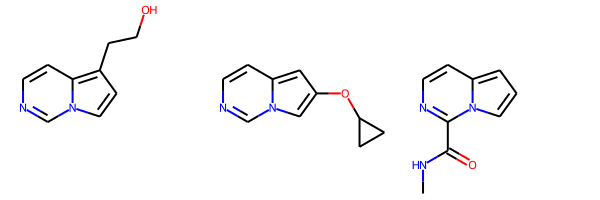

In [248]:
from rdkit.Chem import Draw
png = Draw.MolsToGridImage(ms,returnPNG=True)
png

In [249]:
"""
NOTE: THIS COMMAND SHOULD WORK BUT DOESN'T
>>> mols = Chem.MolsFromPNGString(png)
>>> for mol in mols:
...     print(Chem.MolToSmiles(mol))
"""

"\nNOTE: THIS COMMAND SHOULD WORK BUT DOESN'T\n>>> mols = Chem.MolsFromPNGString(png)\n>>> for mol in mols:\n...     print(Chem.MolToSmiles(mol))\n"

### Substructure Searching

Substructure matching can be done using query molecules built from SMARTS:

In [250]:
m = Chem.MolFromSmiles('c1ccccc1O')
patt = Chem.MolFromSmarts('ccO')
print( m.HasSubstructMatch(patt) )
print( m.GetSubstructMatch(patt) )

True
(0, 5, 6)


Those are the atom indices in m, ordered as patt’s atoms. To get all of the matches:

In [251]:
m.GetSubstructMatches(patt)

((0, 5, 6), (4, 5, 6))

This can be used to easily filter lists of molecules:

In [252]:
patt = Chem.MolFromSmarts('c[NH1]')
matches = []
with Chem.SDMolSupplier('data/actives_5ht3.sdf') as suppl:
    for mol in suppl:
        if mol.HasSubstructMatch(patt):
            matches.append(mol)
len(matches)

22

We can write the same thing more compactly using Python’s list comprehension syntax:

In [253]:
with Chem.SDMolSupplier('data/actives_5ht3.sdf') as suppl:
    matches = [x for x in suppl if x.HasSubstructMatch(patt)]
len(matches)

22

Substructure matching can also be done using molecules built from SMILES instead of SMARTS:

In [254]:
m = Chem.MolFromSmiles('C1=CC=CC=C1OC')
print( m.HasSubstructMatch(Chem.MolFromSmarts('CO')) )

print( m.HasSubstructMatch(Chem.MolFromSmiles('CO')) )

True
True


But don’t forget that the semantics of the two languages are not exactly equivalent:

In [255]:
print( m.HasSubstructMatch(Chem.MolFromSmiles('COC')) )
print( m.HasSubstructMatch(Chem.MolFromSmarts('COC')) )
print( m.HasSubstructMatch(Chem.MolFromSmarts('COc')) ) #<- need an aromatic C

True
False
True


### Stereochemistry in substructure matches

By default information about stereochemistry is not used in substructure searches:

In [256]:
m = Chem.MolFromSmiles('CC[C@H](F)Cl')
print( m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl')) )
print( m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl')) )
print( m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl')) )

True
True
True


But this can be changed via the useChirality argument:

In [257]:
print (m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'),useChirality=True) )
print( m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl'),useChirality=True) )
print( m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'),useChirality=True) )

True
False
True


Notice that when useChirality is set a non-chiral query does match a chiral molecule. The same is not true for a chiral query and a non-chiral molecule:

In [258]:
print( m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl')) )
m2 = Chem.MolFromSmiles('CCC(F)Cl')
print( m2.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'),useChirality=True) )

True
False


### Atom Map Indices in SMARTS

It is possible to attach indices to the atoms in the SMARTS pattern. This is most often done in reaction SMARTS (see Chemical Reactions), but is more general than that. For example, in the SMARTS patterns for torsion angle analysis published by Guba et al. (`DOI: acs.jcim.5b00522`) indices are used to define the four atoms of the torsion of interest. This allows additional atoms to be used to define the environment of the four torsion atoms, as in `[cH0:1][c:2]([cH0])!@[CX3!r:3]=[NX2!r:4]` for an aromatic C=N torsion. We might wonder in passing why they didn’t use recursive SMARTS for this, which would have made life easier, but it is what it is. The atom lists from `GetSubstructureMatches` are guaranteed to be in order of the SMARTS, but in this case we’ll get five atoms so we need a way of picking out, in the correct order, the four of interest. When the SMARTS is parsed, the relevant atoms are assigned an atom map number property that we can easily extract:

In [259]:
qmol = Chem.MolFromSmarts( '[cH0:1][c:2]([cH0])!@[CX3!r:3]=[NX2!r:4]' )
ind_map = {}
for atom in qmol.GetAtoms() :
    map_num = atom.GetAtomMapNum()
    if map_num:
        ind_map[map_num-1] = atom.GetIdx()
print( ind_map )
map_list = [ind_map[x] for x in sorted(ind_map)]
print( map_list )

{0: 0, 1: 1, 2: 3, 3: 4}
[0, 1, 3, 4]


Then, when using the query on a molecule you can get the indices of the four matching atoms like this:

In [260]:
mol = Chem.MolFromSmiles('Cc1cccc(C)c1C(C)=NC')
for match in mol.GetSubstructMatches( qmol ) :
    mas = [match[x] for x in map_list]
    print(mas)

[1, 7, 8, 10]


### Advanced substructure matching

Starting with the 2020.03 release, the RDKit allows you to provide an optional function that is used to check whether or not a possible substructure match should be accepted. This function is called with the molecule to be matched and the indices of the matching atoms.

Here’s an example of how you can use the functionality to do “Markush-like” matching, requiring that all atoms in a sidechain are either carbon (type “all_carbon”) or aren’t aromatic (type “alkyl”). We start by defining the class that we’ll use to test the sidechains:

In [261]:
from rdkit import Chem

class SidechainChecker(object):
  matchers = {
    'alkyl': lambda at: not at.GetIsAromatic(),
    'all_carbon': lambda at: at.GetAtomicNum() == 6
  }

  def __init__(self, query, pName="queryType"):
    # identify the atoms that have the properties we care about
    self._atsToExamine = [(x.GetIdx(), x.GetProp(pName)) for x in query.GetAtoms()
                          if x.HasProp(pName)]
    self._pName = pName

  def __call__(self, mol, vect):
    seen = [0] * mol.GetNumAtoms()
    for idx in vect:
      seen[idx] = 1
    # loop over the atoms we care about:
    for idx, qtyp in self._atsToExamine:
      midx = vect[idx]
      stack = [midx]
      atom = mol.GetAtomWithIdx(midx)
      # now do a breadth-first search from that atom, checking
      # all of its neighbors that aren't in the substructure
      # query:
      stack = [atom]
      while stack:
        atom = stack.pop(0)
        if not self.matchers[qtyp](atom):
          return False
        seen[atom.GetIdx()] = 1
        for nbr in atom.GetNeighbors():
          if not seen[nbr.GetIdx()]:
            stack.append(nbr)
    return True

And the default behavior:

In [262]:
m = Chem.MolFromSmiles('C2NCC2CC1C(CCCC)C(OCCCC)C1c2ccccc2')
p = Chem.MolFromSmarts('C1CCC1*')
p.GetAtomWithIdx(4).SetProp("queryType", "all_carbon")
print( m.GetSubstructMatches(p) )

((5, 6, 11, 17, 18), (5, 17, 11, 6, 7), (6, 5, 17, 11, 12), (6, 11, 17, 5, 4))


Now let’s add the final check to filter the results:

In [263]:
params = Chem.SubstructMatchParameters()
checker = SidechainChecker(p)
params.setExtraFinalCheck(checker)
print( m.GetSubstructMatches(p,params) )

((5, 6, 11, 17, 18), (5, 17, 11, 6, 7))


Repeat that using the ‘alkyl’ query:

In [264]:
p.GetAtomWithIdx(4).SetProp("queryType", "alkyl")
checker = SidechainChecker(p)
params.setExtraFinalCheck(checker)
print( m.GetSubstructMatches(p,params) )

((5, 17, 11, 6, 7), (6, 5, 17, 11, 12), (6, 11, 17, 5, 4))


## Chemical Transformations

The RDKit contains a number of functions for modifying molecules. Note that these transformation functions are intended to provide an easy way to make simple modifications to molecules. For more complex transformations, use the Chemical Reactions functionality.

### Substructure-based transformations

There’s a variety of functionality for using the RDKit’s substructure-matching machinery for doing quick molecular transformations. These transformations include deleting substructures:

In [265]:
m = Chem.MolFromSmiles('CC(=O)O')
patt = Chem.MolFromSmarts('C(=O)[OH]')
rm = AllChem.DeleteSubstructs(m,patt)
print( Chem.MolToSmiles(rm) )

C


replacing substructures:

In [266]:
repl = Chem.MolFromSmiles('OC')
patt = Chem.MolFromSmarts('[$(NC(=O))]')
m = Chem.MolFromSmiles('CC(=O)N')
rms = AllChem.ReplaceSubstructs(m,patt,repl)
print( rms )
print( Chem.MolToSmiles(rms[0]) )

(<rdkit.Chem.rdchem.Mol object at 0x7f29189f0930>,)
COC(C)=O


as well as simple SAR-table transformations like removing side chains:

In [267]:
m1 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
tmp = Chem.ReplaceSidechains(m1,core)
print( Chem.MolToSmiles(tmp) )

[1*]c1cncnc1[2*]


and removing cores:

In [268]:
tmp = Chem.ReplaceCore(m1,core)
print( Chem.MolToSmiles(tmp) )

[1*]CCBr.[2*]C(=O)O


By default the sidechains are labeled based on the order they are found. They can also be labeled according by the number of that core-atom they’re attached to:

In [269]:
m1 = Chem.MolFromSmiles('c1c(CCO)ncnc1C(=O)O')
tmp=Chem.ReplaceCore(m1,core,labelByIndex=True)
print( Chem.MolToSmiles(tmp) )

[1*]CCO.[5*]C(=O)O


`rdkit.Chem.rdmolops.ReplaceCore()` returns the sidechains in a single molecule. This can be split into separate molecules using `rdkit.Chem.rdmolops.GetMolFrags()` :

In [270]:
rs = Chem.GetMolFrags(tmp,asMols=True)
print( len(rs) )
print( Chem.MolToSmiles(rs[0]) )
print( Chem.MolToSmiles(rs[1]) )

2
[1*]CCO
[5*]C(=O)O


### Murcko Decomposition

The RDKit provides standard Murcko-type decomposition 7 of molecules into scaffolds:

In [271]:
from rdkit.Chem.Scaffolds import MurckoScaffold
with Chem.SDMolSupplier('data/cdk2.sdf') as cdk2mols:
    m1 = cdk2mols[0]
core = MurckoScaffold.GetScaffoldForMol(m1)
print( Chem.MolToSmiles(core) )

c1ncc2nc[nH]c2n1


or into a generic framework:

In [272]:
fw = MurckoScaffold.MakeScaffoldGeneric(core)
print( Chem.MolToSmiles(fw) )

C1CCC2CCCC2C1


### Maximum Common Substructure

The FindMCS function find a maximum common substructure (MCS) of two or more molecules:

In [273]:
from rdkit.Chem import rdFMCS
mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mol3 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1")
mols = [mol1,mol2,mol3]
res=rdFMCS.FindMCS(mols)
print( res )
print( res.numAtoms )
print( res.numBonds )
print( res.smartsString )
print( res.canceled )

10
10
[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]
False


It returns an MCSResult instance with information about the number of atoms and bonds in the MCS, the SMARTS string which matches the identified MCS, and a flag saying if the algorithm timed out. If no MCS is found then the number of atoms and bonds is set to 0 and the SMARTS to ''.

By default, two atoms match if they are the same element and two bonds match if they have the same bond type. Specify atomCompare and bondCompare to use different comparison functions, as in:

In [274]:
mols = (Chem.MolFromSmiles('NCC'),Chem.MolFromSmiles('OC=C'))
print( rdFMCS.FindMCS(mols).smartsString )
print( rdFMCS.FindMCS(mols, atomCompare=rdFMCS.AtomCompare.CompareAny).smartsString )
print( rdFMCS.FindMCS(mols, bondCompare=rdFMCS.BondCompare.CompareAny).smartsString )

[#6]
[#7,#8]-[#6]
[#6]-,=[#6]


The options for the atomCompare argument are: CompareAny says that any atom matches any other atom, CompareElements compares by element type, and CompareIsotopes matches based on the isotope label. Isotope labels can be used to implement user-defined atom types. A bondCompare of CompareAny says that any bond matches any other bond, CompareOrderExact says bonds are equivalent if and only if they have the same bond type, and CompareOrder allows single and aromatic bonds to match each other, but requires an exact order match otherwise:

In [275]:
mols = (Chem.MolFromSmiles('c1ccccc1'),Chem.MolFromSmiles('C1CCCC=C1'))
print( rdFMCS.FindMCS(mols,bondCompare=rdFMCS.BondCompare.CompareAny).smartsString )
print( rdFMCS.FindMCS(mols,bondCompare=rdFMCS.BondCompare.CompareOrderExact).smartsString )
print( rdFMCS.FindMCS(mols,bondCompare=rdFMCS.BondCompare.CompareOrder).smartsString )

[#6]1:,-[#6]:,-[#6]:,-[#6]:,-[#6]:,=[#6]:,-1
[#6]
[#6](:,-[#6]:,-[#6]:,-[#6]):,-[#6]:,-[#6]


A substructure has both atoms and bonds. By default, the algorithm attempts to maximize the number of bonds found. You can change this by setting the `maximizeBonds` argument to False. Maximizing the number of bonds tends to maximize the number of rings, although two small rings may have fewer bonds than one large ring.

You might not want a 3-valent nitrogen to match one which is 5-valent. The default `matchValences` value of False ignores valence information. When True, the atomCompare setting is modified to also require that the two atoms have the same valency.

In [276]:
mols = (Chem.MolFromSmiles('NC1OC1'),Chem.MolFromSmiles('C1OC1[N+](=O)[O-]'))
print( rdFMCS.FindMCS(mols).numAtoms )
print( rdFMCS.FindMCS(mols, matchValences=True).numBonds )

4
3


It can be strange to see a linear carbon chain match a carbon ring, which is what the `ringMatchesRingOnly` default of False does. If you set it to True then ring bonds will only match ring bonds.

In [277]:
mols = [Chem.MolFromSmiles("C1CCC1CCC"), Chem.MolFromSmiles("C1CCCCCC1")]
print( rdFMCS.FindMCS(mols).smartsString )
print( rdFMCS.FindMCS(mols, ringMatchesRingOnly=True).smartsString )

[#6](-[#6]-[#6])-[#6]-[#6]-[#6]-[#6]
[#6&R](-&@[#6&R]-&@[#6&R])-&@[#6&R]


Notice that the SMARTS returned now include ring queries on the atoms and bonds.

You can further restrict things and require that partial rings (as in this case) are not allowed. That is, if an atom is part of the MCS and the atom is in a ring of the entire molecule then that atom is also in a ring of the MCS. Setting `completeRingsOnly` to True toggles this requirement.

In [278]:
mols = [Chem.MolFromSmiles("CCC1CC2C1CN2"), Chem.MolFromSmiles("C1CC2C1CC2")]
print( rdFMCS.FindMCS(mols).smartsString )
print( rdFMCS.FindMCS(mols, ringMatchesRingOnly=True).smartsString )
print( rdFMCS.FindMCS(mols, completeRingsOnly=True).smartsString )

[#6]1-[#6]-[#6](-[#6]-1-[#6])-[#6]
[#6&R](-&@[#6&R]-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]
[#6]1-&@[#6]-&@[#6]-&@[#6]-&@1


Of course the two options can be combined with each other:

In [279]:
ms = [Chem.MolFromSmiles(x) for x in ('CC1CCC1','CCC1CC1',)]
print( rdFMCS.FindMCS(ms,ringMatchesRingOnly=True).smartsString )
print( rdFMCS.FindMCS(ms,completeRingsOnly=True).smartsString )
print( rdFMCS.FindMCS(ms,ringMatchesRingOnly=True,completeRingsOnly=True).smartsString )

[#6&!R]-&!@[#6&R](-&@[#6&R])-&@[#6&R]
[#6]-&!@[#6]
[#6&!R]-&!@[#6&R]


The MCS algorithm will exhaustively search for a maximum common substructure. Typically this takes a fraction of a second, but for some comparisons this can take minutes or longer. Use the `timeout` parameter to stop the search after the given number of seconds (wall-clock seconds, not CPU seconds) and return the best match found in that time. If timeout is reached then the `canceled` property of the MCSResult will be True instead of False.

In [280]:
mols = [Chem.MolFromSmiles("Nc1ccccc1"*10), Chem.MolFromSmiles("Nc1ccccccccc1"*10)]
print( rdFMCS.FindMCS(mols, timeout=1).canceled )

True


(The MCS after 50 seconds contained 511 atoms.)

## Fingerprinting and Molecular Similarity

The RDKit has a variety of built-in functionality for generating molecular fingerprints and using them to calculate molecular similarity.

### Topological Fingerprints

In [281]:
from rdkit import DataStructs
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'),
        Chem.MolFromSmiles('COC')]
fps = [Chem.RDKFingerprint(x) for x in ms]
print( DataStructs.FingerprintSimilarity(fps[0],fps[1]) )
print( DataStructs.FingerprintSimilarity(fps[0],fps[2]) )
print( DataStructs.FingerprintSimilarity(fps[1],fps[2]) )

0.6
0.4
0.25


More details about the algorithm used for the RDKit fingerprint can be found in the “RDKit Book”.

The default set of parameters used by the fingerprinter is: - minimum path size: 1 bond - maximum path size: 7 bonds - fingerprint size: 2048 bits - number of bits set per hash: 2 - minimum fingerprint size: 64 bits - target on-bit density 0.0

You can control these when calling `rdkit.Chem.rdmolops.RDKFingerprint()`. The function `rdkit.Chem.Fingerprints.FingerprintMols.FingerprintMol()` (written in python) shows how this is done.

The default similarity metric used by `rdkit.DataStructs.FingerprintSimilarity()` is the Tanimoto similarity. One can use different similarity metrics:

In [282]:
print( DataStructs.FingerprintSimilarity(fps[0],fps[1], metric=DataStructs.DiceSimilarity) )

0.75


Available similarity metrics include Tanimoto, Dice, Cosine, Sokal, Russel, Kulczynski, McConnaughey, and Tversky.

### MACCS Keys

There is a SMARTS-based implementation of the 166 public MACCS keys.

In [375]:
from rdkit.Chem import MACCSkeys
fps = [MACCSkeys.GenMACCSKeys(x) for x in ms]
print( DataStructs.FingerprintSimilarity(fps[0],fps[1]) )
print( DataStructs.FingerprintSimilarity(fps[0],fps[2]) )
print( DataStructs.FingerprintSimilarity(fps[1],fps[2]) )

0.9859154929577465
0.9859154929577465
1.0


The MACCS keys were critically evaluated and compared to other MACCS implementations in Q3 2008. In cases where the public keys are fully defined, things looked pretty good.


### Atom Pairs and Topological Torsions

Atom-pair descriptors are available in several different forms. The standard form is as fingerprint including counts for each bit instead of just zeros and ones:

In [284]:
from rdkit.Chem.AtomPairs import Pairs
ms = [Chem.MolFromSmiles('C1CCC1OCC'),Chem.MolFromSmiles('CC(C)OCC'),Chem.MolFromSmiles('CCOCC')]
pairFps = [Pairs.GetAtomPairFingerprint(x) for x in ms]

Because the space of bits that can be included in atom-pair fingerprints is huge, they are stored in a sparse manner. We can get the list of bits and their counts for each fingerprint as a dictionary:

In [285]:
d = pairFps[-1].GetNonzeroElements()
print( d[541732] )
print( d[1606690] )

1
2


Descriptions of the bits are also available:

In [286]:
Pairs.ExplainPairScore(558115)

(('C', 1, 0), 3, ('C', 2, 0))

The above means: C with 1 neighbor and 0 pi electrons which is 3 bonds from a C with 2 neighbors and 0 pi electrons

The usual metric for similarity between atom-pair fingerprints is Dice similarity:

In [287]:
from rdkit import DataStructs
print( DataStructs.DiceSimilarity(pairFps[0],pairFps[1]) )
print( DataStructs.DiceSimilarity(pairFps[0],pairFps[2]) )
print( DataStructs.DiceSimilarity(pairFps[1],pairFps[2]) )

0.3333333333333333
0.25806451612903225
0.56


It’s also possible to get atom-pair descriptors encoded as a standard bit vector fingerprint (ignoring the count information):

In [288]:
pairFps = [Pairs.GetAtomPairFingerprintAsBitVect(x) for x in ms]

Since these are standard bit vectors, the `rdkit.DataStructs` module can be used for similarity:

In [289]:
from rdkit import DataStructs
print( DataStructs.DiceSimilarity(pairFps[0],pairFps[1]) )
print( DataStructs.DiceSimilarity(pairFps[0],pairFps[2]) )
print( DataStructs.DiceSimilarity(pairFps[1],pairFps[2]) )

0.48
0.38095238095238093
0.625


Topological torsion descriptors are calculated in essentially the same way:

### Morgan Fingerprints (Circular Fingerprints)

This family of fingerprints, better known as circular fingerprints, is built by applying the Morgan algorithm to a set of user-supplied atom invariants. When generating Morgan fingerprints, the radius of the fingerprint must also be provided :

In [290]:
from rdkit.Chem import AllChem
m1 = Chem.MolFromSmiles('Cc1ccccc1') 
fp1 = AllChem.GetMorganFingerprint(m1,2)
print( fp1 )
m2 = Chem.MolFromSmiles('Cc1ncccc1')
fp2 = AllChem.GetMorganFingerprint(m2,2)
print( DataStructs.DiceSimilarity(fp1,fp2) )

0.55


Morgan fingerprints, like atom pairs and topological torsions, use counts by default, but it’s also possible to calculate them as bit vectors:

In [291]:
fp1 = AllChem.GetMorganFingerprintAsBitVect(m1,2,nBits=1024)
print( fp1 )
fp2 = AllChem.GetMorganFingerprintAsBitVect(m2,2,nBits=1024)
print( DataStructs.DiceSimilarity(fp1,fp2) )

0.5185185185185185


The default atom invariants use connectivity information similar to those used for the well known ECFP family of fingerprints. Feature-based invariants, similar to those used for the FCFP fingerprints, can also be used. The feature definitions used are defined in the section Feature Definitions Used in the Morgan Fingerprints. At times this can lead to quite different similarity scores:

In [292]:
m1 = Chem.MolFromSmiles('c1ccccn1')
m2 = Chem.MolFromSmiles('c1ccco1')
fp1 = AllChem.GetMorganFingerprint(m1,2)
fp2 = AllChem.GetMorganFingerprint(m2,2)
ffp1 = AllChem.GetMorganFingerprint(m1,2,useFeatures=True)
ffp2 = AllChem.GetMorganFingerprint(m2,2,useFeatures=True)
print( DataStructs.DiceSimilarity(fp1,fp2) )
print( DataStructs.DiceSimilarity(ffp1,ffp2) )

0.36363636363636365
0.9090909090909091


When comparing the ECFP/FCFP fingerprints and the Morgan fingerprints generated by the RDKit, remember that the 4 in ECFP4 corresponds to the diameter of the atom environments considered, while the Morgan fingerprints take a radius parameter. So the examples above, with radius=2, are roughly equivalent to ECFP4 and FCFP4.

The user can also provide their own atom invariants using the optional invariants argument to `rdkit.Chem.rdMolDescriptors.GetMorganFingerprint()`. Here’s a simple example that uses a constant for the invariant; the resulting fingerprints compare the topology of molecules:

In [293]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')
m2 = Chem.MolFromSmiles('Cc1ncncn1')
fp1 = AllChem.GetMorganFingerprint(m1,2,invariants=[1]*m1.GetNumAtoms())
fp2 = AllChem.GetMorganFingerprint(m2,2,invariants=[1]*m2.GetNumAtoms())
print( fp1==fp2 )

True


Note that bond order is by default still considered:

In [294]:
m3 = Chem.MolFromSmiles('CC1CCCCC1')
fp3 = AllChem.GetMorganFingerprint(m3,2,invariants=[1]*m3.GetNumAtoms())
print( fp1==fp3 )

False


But this can also be turned off:

In [295]:
fp1 = AllChem.GetMorganFingerprint(m1,2,invariants=[1]*m1.GetNumAtoms(),
        useBondTypes=False)
fp3 = AllChem.GetMorganFingerprint(m3,2,invariants=[1]*m3.GetNumAtoms(),
useBondTypes=False)
print( fp1==fp3 )

True


### Explaining bits from Morgan Fingerprints

Information is available about the atoms that contribute to particular bits in the Morgan fingerprint via the bitInfo argument. The dictionary provided is populated with one entry per bit set in the fingerprint, the keys are the bit ids, the values are lists of (atom index, radius) tuples.

In [296]:
m = Chem.MolFromSmiles('c1cccnc1C')
info={}
fp = AllChem.GetMorganFingerprint(m,2,bitInfo=info)
print( len(fp.GetNonzeroElements()) )
print( len(info) )
print( info[98513984] )
print( info[4048591891] )

16
16
((1, 1), (2, 1))
((5, 2),)


Interpreting the above: bit 98513984 is set twice: once by atom 1 and once by atom 2, each at radius 1. Bit 4048591891 is set once by atom 5 at radius 2.

Focusing on bit 4048591891, we can extract the submolecule consisting of all atoms within a radius of 2 of atom 5:

In [297]:
env = Chem.FindAtomEnvironmentOfRadiusN(m,2,5)
amap={}
submol=Chem.PathToSubmol(m,env,atomMap=amap)
print( submol.GetNumAtoms() )
print( amap )

6
{0: 0, 1: 1, 3: 2, 4: 3, 5: 4, 6: 5}


And then “explain” the bit by generating SMILES for that submolecule:

In [298]:
print( Chem.MolToSmiles(submol) )

ccc(C)nc


This is more useful when the SMILES is rooted at the central atom:

In [299]:
print( Chem.MolToSmiles(submol,rootedAtAtom=amap[5],canonical=False) )

c(cc)(nc)C


An alternate (and faster, particularly for large numbers of molecules) approach to do the same thing, using the function `rdkit.Chem.MolFragmentToSmiles()` :

In [300]:
atoms=set()
for bidx in env:
    atoms.add(m.GetBondWithIdx(bidx).GetBeginAtomIdx())
    atoms.add(m.GetBondWithIdx(bidx).GetEndAtomIdx())
print( Chem.MolFragmentToSmiles(m,atomsToUse=list(atoms),bondsToUse=env,rootedAtAtom=5) )

c(C)(cc)nc


### Generating images of fingerprint bits

For the Morgan and RDKit fingerprint types, it’s possible to generate images of the atom environment that defines the bit using the functions `rdkit.Chem.Draw.DrawMorganBit()` and `rdkit.Chem.Draw.DrawRDKitBit()`

In [301]:
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
print( bi[872] )
mfp2_svg = Draw.DrawMorganBit(mol, 872, bi, useSVG=True)
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi)
print( rdkbi[1553] )
rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi, useSVG=True)

((6, 2),)
[[0, 1, 9, 5, 4], [2, 3, 4, 9, 5]]


The default highlight colors for the Morgan bits indicate:

   * blue: the central atom in the environment

   * yellow: aromatic atoms

   * gray: aliphatic ring atoms

The default highlight colors for the RDKit bits indicate:

   * yellow: aromatic atoms

Note that in cases where the same bit is set by multiple atoms in the molecule (as for bit 1553 for the RDKit fingerprint in the example above), the drawing functions will display the first example. You can change this by specifying which example to show:

In [302]:
rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi, whichExample=1, useSVG=True)

Producing this image:

### Picking Diverse Molecules Using Fingerprints

A common task is to pick a small subset of diverse molecules from a larger set. The RDKit provides a number of approaches for doing this in the `rdkit.SimDivFilters` module. The most efficient of these uses the MaxMin algorithm. Here’s an example:

Start by reading in a set of molecules and generating Morgan fingerprints:

In [303]:
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
with Chem.SDMolSupplier('data/actives_5ht3.sdf') as suppl:
    ms = [x for x in suppl if x is not None]
fps = [GetMorganFingerprint(x,3) for x in ms]
nfps = len(fps)

The algorithm requires a function to calculate distances between objects, we’ll do that using `DiceSimilarity`:

In [304]:
def distij(i,j,fps=fps):
    return 1-DataStructs.DiceSimilarity(fps[i],fps[j])

Now create a picker and grab a set of 10 diverse molecules:

In [305]:
picker = MaxMinPicker()
pickIndices = picker.LazyPick(distij,nfps,10,seed=23)
print( list(pickIndices) )

[93, 109, 154, 6, 95, 135, 151, 61, 137, 139]


Note that the picker just returns indices of the fingerprints; we can get the molecules themselves as follows:

In [306]:
picks = [ms[x] for x in pickIndices]

### Generating Similarity Maps Using Fingerprints

Similarity maps are a way to visualize the atomic contributions to the similarity between a molecule and a reference molecule. The methodology is described in Ref. 17 . They are in the `rdkit.Chem.Draw.SimilarityMaps` module :

Start by creating two molecules:

In [307]:
from rdkit import Chem
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

The SimilarityMaps module supports three kind of fingerprints: atom pairs, topological torsions and Morgan fingerprints.

In [308]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

The types of atom pairs and torsions are normal (default), hashed and bit vector (bv). The types of the Morgan fingerprint are bit vector (bv, default) and count vector (count).

The function generating a similarity map for two fingerprints requires the specification of the fingerprint function and optionally the similarity metric. The default for the latter is the Dice similarity. Using all the default arguments of the Morgan fingerprint function, the similarity map can be generated like this:

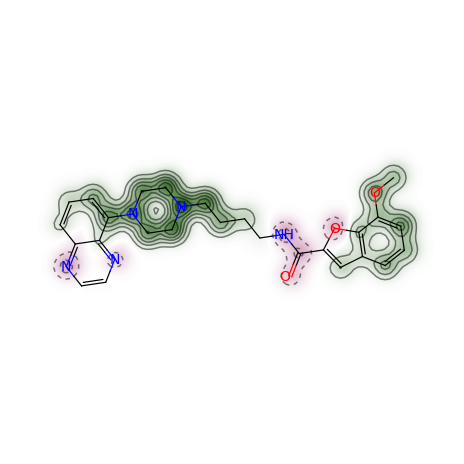

In [309]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

For a different type of Morgan (e.g. count) and radius = 1 instead of 2, as well as a different similarity metric (e.g. Tanimoto), the call becomes:

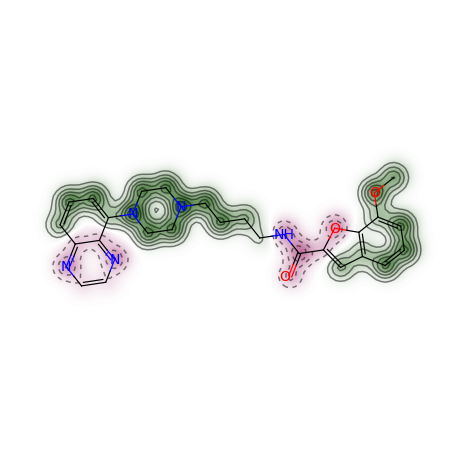

In [310]:
from rdkit import DataStructs
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=1, fpType='count'), metric=DataStructs.TanimotoSimilarity)

The convenience function GetSimilarityMapForFingerprint involves the normalisation of the atomic weights such that the maximum absolute weight is 1. Therefore, the function outputs the maximum weight that was found when creating the map.

In [311]:
print( maxweight )

0.05747126436781608


If one does not want the normalisation step, the map can be created like:

['0.05 ', '0.07 ', '0.05 ', '0.08 ', '0.05 ', '0.06 ', '0.03 ', '0.04 ', '-0.01 ', '-0.04 ', '-0.03 ', '-0.05 ', '0.01 ', '0.03 ', '0.07 ', '0.10 ', '0.12 ', '0.11 ', '0.09 ', '0.10 ', '0.09 ', '0.06 ', '0.03 ', '0.02 ', '-0.01 ', '-0.05 ', '0.00 ', '0.00 ', '-0.03 ', '0.02 ', '0.09 ', '0.11 ', '-0.04 ', '0.04 ']


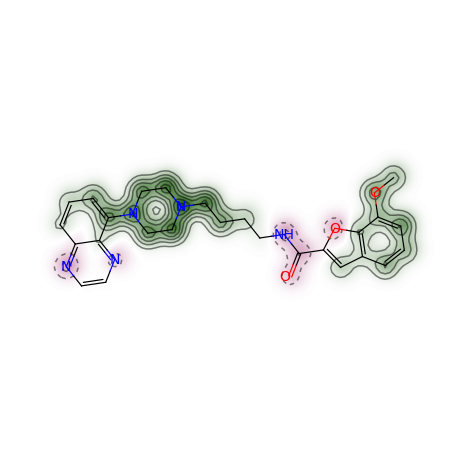

In [312]:
weights = SimilarityMaps.GetAtomicWeightsForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

print(["%.2f " % w for w in weights])

fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, weights)

### Descriptor Calculation

A variety of descriptors are available within the RDKit. The complete list is provided in List of Available Descriptors.

Most of the descriptors are straightforward to use from Python via the centralized `rdkit.Chem.Descriptors` module :

In [313]:
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
print( Descriptors.TPSA(m) )
print( Descriptors.MolLogP(m) )

37.3
1.3848


Partial charges are handled a bit differently:

In [314]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
AllChem.ComputeGasteigerCharges(m)
print( m.GetAtomWithIdx(0).GetDoubleProp('_GasteigerCharge') )

-0.04769375004654255


### Visualization of Descriptors

Similarity maps can be used to visualize descriptors that can be divided into atomic contributions.

The Gasteiger partial charges can be visualized as (using a different color scheme):

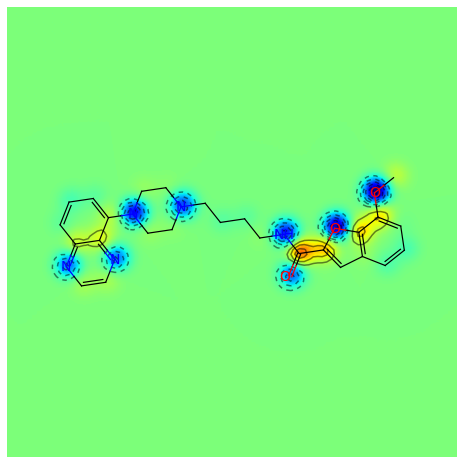

In [315]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

Or for the Crippen contributions to logP:

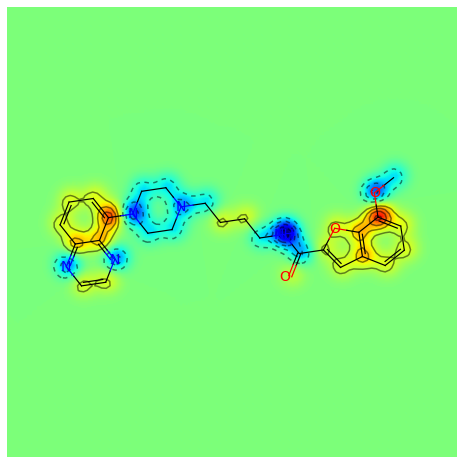

In [316]:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)

### Chemical Reactions

The RDKit also supports applying chemical reactions to sets of molecules. One way of constructing chemical reactions is to use a SMARTS-based language similar to Daylight’s Reaction SMILES:

In [317]:
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]')
print( rxn )
rxn.GetNumProductTemplates()
ps = rxn.RunReactants((Chem.MolFromSmiles('CC(=O)O'),Chem.MolFromSmiles('NC')))
print( len(ps) ) # one entry for each possible set of products
print( len(ps[0]) ) # each entry contains one molecule for each product

print( Chem.MolToSmiles(ps[0][0]) )
ps = rxn.RunReactants((Chem.MolFromSmiles('C(COC(=O)O)C(=O)O'),Chem.MolFromSmiles('NC')))
print( len(ps) )
print( Chem.MolToSmiles(ps[0][0]) )
print( Chem.MolToSmiles(ps[1][0]) )

1
1
CNC(C)=O
2
CNC(=O)OCCC(=O)O
CNC(=O)CCOC(=O)O


Reactions can also be built from MDL rxn files:

In [318]:
rxn = AllChem.ReactionFromRxnFile('data/AmideBond.rxn')
print( rxn.GetNumReactantTemplates() )
print( rxn.GetNumProductTemplates() )
ps = rxn.RunReactants((Chem.MolFromSmiles('CC(=O)O'), Chem.MolFromSmiles('NC')))
print( len(ps) )
print( Chem.MolToSmiles(ps[0][0]) )

2
1
1
CNC(C)=O


It is, of course, possible to do reactions more complex than amide bond formation:

In [319]:
rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[*:4][*:5]=[C:6]>>[C:1]1[C:2][C:3][*:4]=[*:5][C:6]1')
ps = rxn.RunReactants((Chem.MolFromSmiles('OC=C'), Chem.MolFromSmiles('C=CC(N)=C')))
print( Chem.MolToSmiles(ps[0][0]) )

NC1=CCCC(O)C1


Note in this case that there are multiple mappings of the reactants onto the templates, so we have multiple product sets:

In [320]:
print(len(ps))

4


You can use canonical smiles and a python dictionary to get the unique products:

In [321]:
uniqps = {}
for p in ps:
    smi = Chem.MolToSmiles(p[0])
    uniqps[smi] = p[0]
print( sorted(uniqps.keys()) )

['NC1=CCC(O)CC1', 'NC1=CCCC(O)C1']


Note that the molecules that are produced by the chemical reaction processing code are not sanitized, as this artificial reaction demonstrates:

In [322]:
rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2][C:3]=[C:4].[C:5]=[C:6]>>[C:1]1=[C:2][C:3]=[C:4][C:5]=[C:6]1')
ps = rxn.RunReactants((Chem.MolFromSmiles('C=CC=C'), Chem.MolFromSmiles('C=C')))
print( Chem.MolToSmiles(ps[0][0]) )
p0 = ps[0][0]
print( Chem.SanitizeMol(p0) )
print( Chem.MolToSmiles(p0) )

C1=CC=CC=C1
SANITIZE_NONE
c1ccccc1


### Drawing Chemical Reactions

The RDKit’s MolDraw2D-based rendering can also handle chemical reactions.

In [323]:
from rdkit.Chem import Draw
rxn = AllChem.ReactionFromSmarts('[cH:5]1[cH:6][c:7]2[cH:8][n:9][cH:10][cH:11][c:12]2[c:3]([cH:4]1)[C:2](=[O:1])O.[N-:13]=[N+:14]=[N-:15]>C(Cl)Cl.C(=O)(C(=O)Cl)Cl>[cH:5]1[cH:6][c:7]2[cH:8][n:9][cH:10][cH:11][c:12]2[c:3]([cH:4]1)[C:2](=[O:1])[N:13]=[N+:14]=[N-:15]',useSmiles=True)
d2d = Draw.MolDraw2DCairo(800,300)
d2d.DrawReaction(rxn)
png = d2d.GetDrawingText()
open('./images/reaction1.o.png','wb+').write(png) 

24318

There’s another drawing mode which leaves out the atom map information but which highlights which of the reactants atoms in the products come from:



In [324]:
d2d = Draw.MolDraw2DCairo(800,300)
d2d.DrawReaction(rxn,highlightByReactant=True)
png = d2d.GetDrawingText()
open('./images/reaction1_highlight.o.png','wb+').write(png)    

24900

As of the 2020.09 release, PNG images of reactions include metadata allowing the reaction to be reconstructed:

In [325]:
newRxn = AllChem.ReactionFromPNGString(png)
print( AllChem.ReactionToSmarts(newRxn) )

[#6H:5]1:[#6H:6]:[#6:7]2:[#6H:8]:[#7:9]:[#6H:10]:[#6H:11]:[#6:12]:2:[#6:3](:[#6H:4]:1)-[#6:2](=[#8:1])-[#8].[#7-:13]=[#7+:14]=[#7-:15]>[#6](-[#17])-[#17].[#6](=[#8])(-[#6](=[#8])-[#17])-[#17]>[#6H:5]1:[#6H:6]:[#6:7]2:[#6H:8]:[#7:9]:[#6H:10]:[#6H:11]:[#6:12]:2:[#6:3](:[#6H:4]:1)-[#6:2](=[#8:1])-[#7:13]=[#7+:14]=[#7-:15]


### Advanced Reaction Functionality

#### Protecting Atoms

Sometimes, particularly when working with rxn files, it is difficult to express a reaction exactly enough to not end up with extraneous products. The RDKit provides a method of “protecting” atoms to disallow them from taking part in reactions.

This can be demonstrated re-using the amide-bond formation reaction used above. The query for amines isn’t specific enough, so it matches any nitrogen that has at least one H attached. So if we apply the reaction to a molecule that already has an amide bond, the amide N is also treated as a reaction site:

In [326]:
rxn = AllChem.ReactionFromRxnFile('data/AmideBond.rxn')
acid = Chem.MolFromSmiles('CC(=O)O')
base = Chem.MolFromSmiles('CC(=O)NCCN')
ps = rxn.RunReactants((acid,base))
print( len(ps) )
print( Chem.MolToSmiles(ps[0][0]) )
print( Chem.MolToSmiles(ps[1][0]) )

2
CC(=O)N(CCN)C(C)=O
CC(=O)NCCNC(C)=O


The first product corresponds to the reaction at the amide N.

We can prevent this from happening by protecting all amide Ns. Here we do it with a substructure query that matches amides and thioamides and then set the “_protected” property on matching atoms:

In [327]:
amidep = Chem.MolFromSmarts('[N;$(NC=[O,S])]')
for match in base.GetSubstructMatches(amidep):
    base.GetAtomWithIdx(match[0]).SetProp('_protected','1')

Now the reaction only generates a single product:

In [328]:
ps = rxn.RunReactants((acid,base))
print( len(ps) )
print( Chem.MolToSmiles(ps[0][0]) )

1
CC(=O)NCCNC(C)=O


### Recap Implementation

Associated with the chemical reaction functionality is an implementation of the Recap algorithm. Recap uses a set of chemical transformations mimicking common reactions carried out in the lab in order to decompose a molecule into a series of reasonable fragments.

The RDKit `rdkit.Chem.Recap` implementation keeps track of the hierarchy of transformations that were applied:

In [329]:
from rdkit import Chem
from rdkit.Chem import Recap
m = Chem.MolFromSmiles('c1ccccc1OCCOC(=O)CC')
hierarch = Recap.RecapDecompose(m)
print( type(hierarch) )

<class 'rdkit.Chem.Recap.RecapHierarchyNode'>


The hierarchy is rooted at the original molecule:

In [330]:
print( hierarch.smiles )

CCC(=O)OCCOc1ccccc1


and each node tracks its children using a dictionary keyed by SMILES:

In [331]:
ks=hierarch.children.keys()
print( sorted(ks) )

['*C(=O)CC', '*CCOC(=O)CC', '*CCOc1ccccc1', '*OCCOc1ccccc1', '*c1ccccc1']


The nodes at the bottom of the hierarchy (the leaf nodes) are easily accessible, also as a dictionary keyed by SMILES:

In [332]:
ks=hierarch.GetLeaves().keys()
ks=sorted(ks)
print( ks )

['*C(=O)CC', '*CCO*', '*CCOc1ccccc1', '*c1ccccc1']


Notice that dummy atoms are used to mark points where the molecule was fragmented.

The nodes themselves have associated molecules:

In [333]:
leaf = hierarch.GetLeaves()[ks[0]]
print( Chem.MolToSmiles(leaf.mol) )

*C(=O)CC


### BRICS Implementation

The RDKit also provides an implementation of the BRICS algorithm. BRICS provides another method for fragmenting molecules along synthetically accessible bonds:

In [334]:
from rdkit.Chem import BRICS
with Chem.SDMolSupplier('data/cdk2.sdf') as cdk2mols:
    m1 = cdk2mols[0]
    m2 = cdk2mols[20]
print( sorted(BRICS.BRICSDecompose(m1)) )
print( sorted(BRICS.BRICSDecompose(m2)) )

['[14*]c1nc(N)nc2[nH]cnc12', '[3*]O[3*]', '[4*]CC(=O)C(C)C']
['[1*]C(=O)NN(C)C', '[14*]c1[nH]nc2c1C(=O)c1c([16*])cccc1-2', '[16*]c1ccc([16*])cc1', '[3*]OC', '[5*]N[5*]']


Notice that RDKit BRICS implementation returns the unique fragments generated from a molecule and that the dummy atoms are tagged to indicate which type of reaction applies.

It’s quite easy to generate the list of all fragments for a group of molecules:

In [335]:
allfrags=set()
with Chem.SDMolSupplier('data/cdk2.sdf') as cdk2mols:
    for m in cdk2mols:
        if m is None:
            continue
        pieces = BRICS.BRICSDecompose(m)
        allfrags.update(pieces)
print( len(allfrags) )
print( sorted(allfrags)[:5] )

90
['NS(=O)(=O)c1ccc(N/N=C2\\C(=O)Nc3ccc(Br)cc32)cc1', '[1*]C(=O)C(C)C', '[1*]C(=O)NN(C)C', '[1*]C(=O)NN1CC[NH+](C)CC1', '[1*]C(C)=O']


The BRICS module also provides an option to apply the BRICS rules to a set of fragments to create new molecules:

In [336]:
import random
random.seed(127)
fragms = [Chem.MolFromSmiles(x) for x in sorted(allfrags)]
random.seed(0xf00d)
ms = BRICS.BRICSBuild(fragms)

The result is a generator object:

In [337]:
print( ms )

<generator object BRICSBuild at 0x7f290abb9050>


That returns molecules on request:

In [338]:
prods = [next(ms) for x in range(10)]
print( prods[0] )

The molecules have not been sanitized, so it’s a good idea to at least update the valences before continuing:

In [339]:
for prod in prods:
    prod.UpdatePropertyCache(strict=False)
print( Chem.MolToSmiles(prods[0],True) )
print( Chem.MolToSmiles(prods[1],True) )
print( Chem.MolToSmiles(prods[2],True) )

CC(C)C(=O)N/C=C1\C(=O)Nc2ccc3ncsc3c21
CC(C)C(=O)N/C=C1\C(=O)Nc2ccccc21
CNC(=O)C(C)C


By default those results come back in a random order (technically the example above will always return the same results since we seeded Python’s random number generator just before calling BRICSBuild()). If you want the results to be returned in a consistent order use the scrambleReagents argument:

In [340]:
ms = BRICS.BRICSBuild(fragms, scrambleReagents=False)
prods = [next(ms) for x in range(10)]
for prod in prods:
    prod.UpdatePropertyCache(strict=False)
print( Chem.MolToSmiles(prods[0],True) )
print( Chem.MolToSmiles(prods[1],True) )
print( Chem.MolToSmiles(prods[2],True) )

COC(=O)C(C)C
CC(C)C(=O)N/C=C1\C(=O)Nc2ccc3ncsc3c21
CC(C)C(=O)N/C=C1\C(=O)Nc2ccccc21


### Other fragmentation approaches

In addition to the methods described above, the RDKit provide a very flexible generic function for fragmenting molecules along user-specified bonds.

Here’s a quick demonstration of using that to break all bonds between atoms in rings and atoms not in rings. We start by finding all the atom pairs:

In [341]:
m = Chem.MolFromSmiles('CC1CC(O)C1CCC1CC1')
bis = m.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]'))
print( bis )

((0, 1), (4, 3), (6, 5), (7, 8))


then we get the corresponding bond indices:

In [342]:
bs = [m.GetBondBetweenAtoms(x,y).GetIdx() for x,y in bis]
print( bs )

[0, 3, 5, 7]


then we use those bond indices as input to the fragmentation function:

In [343]:
nm = Chem.FragmentOnBonds(m,bs)

the output is a molecule that has dummy atoms marking the places where bonds were broken:

In [344]:
print( Chem.MolToSmiles(nm,True) )

*C1CC([4*])C1[6*].[1*]C.[3*]O.[5*]CC[8*].[7*]C1CC1


By default the attachment points are labelled (using isotopes) with the index of the atom that was removed. We can also provide our own set of atom labels in the form of pairs of unsigned integers. The first value in each pair is used as the label for the dummy that replaces the bond’s begin atom, the second value in each pair is for the dummy that replaces the bond’s end atom. Here’s an example, repeating the analysis above and marking the positions where the non-ring atoms were with the label 10 and marking the positions where the ring atoms were with label 1:

In [345]:
bis = m.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]'))
bs = []
labels=[]
for bi in bis: 
    b = m.GetBondBetweenAtoms(bi[0],bi[1])
    if b.GetBeginAtomIdx()==bi[0]:
        labels.append((10,1))
    else:
        labels.append((1,10))
    bs.append(b.GetIdx())
nm = Chem.FragmentOnBonds(m,bs,dummyLabels=labels)
Chem.MolToSmiles(nm,True)

'[1*]C.[1*]CC[1*].[1*]O.[10*]C1CC([10*])C1[10*].[10*]C1CC1'

## Chemical Features and Pharmacophores

### Chemical Features

Chemical features in the RDKit are defined using a SMARTS-based feature definition language (described in detail in the RDKit book). To identify chemical features in molecules, you first must build a feature factory:

In [346]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

and then use the factory to search for features:

In [347]:
m = Chem.MolFromSmiles('OCc1ccccc1CN')
feats = factory.GetFeaturesForMol(m)
print( len(feats) )

8


The individual features carry information about their family (e.g. donor, acceptor, etc.), type (a more detailed description), and the atom(s) that is/are associated with the feature:

In [348]:
print( feats[0].GetFamily() )
print( feats[0].GetType() )
print( feats[0].GetAtomIds() )
print( feats[4].GetFamily() )
print( feats[4].GetAtomIds() )

Donor
SingleAtomDonor
(0,)
Aromatic
(2, 3, 4, 5, 6, 7)


If the molecule has coordinates, then the features will also have reasonable locations:

In [349]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(m)
print( feats[0].GetPos() )
print( list(feats[0].GetPos()) )

[2.0705367611607857, -2.3356749604090465, 0.0]


### 2D Pharmacophore Fingerprints

Combining a set of chemical features with the 2D (topological) distances between them gives a 2D pharmacophore. When the distances are binned, unique integer ids can be assigned to each of these pharmacophores and they can be stored in a fingerprint. Details of the encoding are in the The RDKit Book.

Generating pharmacophore fingerprints requires chemical features generated via the usual RDKit feature-typing mechanism:

In [350]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
fdefName = 'data/MinimalFeatures.fdef'
featFactory = ChemicalFeatures.BuildFeatureFactory(fdefName)

The fingerprints themselves are calculated using a signature (fingerprint) factory, which keeps track of all the parameters required to generate the pharmacophore:

In [351]:
from rdkit.Chem.Pharm2D.SigFactory import SigFactory
sigFactory = SigFactory(featFactory,minPointCount=2,maxPointCount=3)
sigFactory.SetBins([(0,2),(2,5),(5,8)])
sigFactory.Init()
print( sigFactory.GetSigSize() )

885


The signature factory is now ready to be used to generate fingerprints, a task which is done using the `rdkit.Chem.Pharm2D.Generate` module:

In [352]:
from rdkit.Chem.Pharm2D import Generate
mol = Chem.MolFromSmiles('OCC(=O)CCCN')
fp = Generate.Gen2DFingerprint(mol,sigFactory)
print( fp )
print( len(fp) )
print( fp.GetNumOnBits() )

885
57


Details about the bits themselves, including the features that are involved and the binned distance matrix between the features, can be obtained from the signature factory:

In [353]:
print( list(fp.GetOnBits())[:5] )
print( sigFactory.GetBitDescription(1) )
print( sigFactory.GetBitDescription(2) )
print( sigFactory.GetBitDescription(8) )
print( list(fp.GetOnBits())[-5:] )
print( sigFactory.GetBitDescription(707) )
print( sigFactory.GetBitDescription(714) )

[1, 2, 6, 7, 8]
Acceptor Acceptor |0 1|1 0|
Acceptor Acceptor |0 2|2 0|
Acceptor Donor |0 2|2 0|
[704, 706, 707, 708, 714]
Donor Donor PosIonizable |0 1 2|1 0 1|2 1 0|
Donor Donor PosIonizable |0 2 2|2 0 0|2 0 0|


For the sake of convenience (to save you from having to edit the fdef file every time) it is possible to disable particular feature types within the SigFactory:

In [354]:
sigFactory.skipFeats=['PosIonizable']
sigFactory.Init()
print( sigFactory.GetSigSize() )
fp2 = Generate.Gen2DFingerprint(mol,sigFactory)
print( fp2.GetNumOnBits() )

510
36


Another possible set of feature definitions for 2D pharmacophore fingerprints in the RDKit are those published by Gobbi and Poppinger. The module `rdkit.Chem.Pharm2D.Gobbi_Pharm2D` has a pre-configured signature factory for these fingerprint types. Here’s an example of using it:

### Molecular Fragments

The RDKit contains a collection of tools for fragmenting molecules and working with those fragments. Fragments are defined to be made up of a set of connected atoms that may have associated functional groups. This is more easily demonstrated than explained:

In [355]:
fName=os.path.join(RDConfig.RDDataDir,'FunctionalGroups.txt')
from rdkit.Chem import FragmentCatalog
fparams = FragmentCatalog.FragCatParams(1,6,fName)
print( fparams.GetNumFuncGroups() )
fcat=FragmentCatalog.FragCatalog(fparams)
fcgen=FragmentCatalog.FragCatGenerator()
m = Chem.MolFromSmiles('OCC=CC(=O)O')
print( fcgen.AddFragsFromMol(m,fcat) )
print( fcat.GetEntryDescription(0) )
print( fcat.GetEntryDescription(1) )
print( fcat.GetEntryDescription(2) )

39
3
C<-O>C
C=C<-C(=O)O>
C<-C(=O)O>=CC<-O>


The fragments are stored as entries in a `rdkit.Chem.rdfragcatalog.FragCatalog`. Notice that the entry descriptions include pieces in angular brackets (e.g. between ‘<’ and ‘>’). These describe the functional groups attached to the fragment. For example, in the above example, the catalog entry 0 corresponds to an ethyl fragment with an alcohol attached to one of the carbons and entry 1 is an ethylene with a carboxylic acid on one carbon. Detailed information about the functional groups can be obtained by asking the fragment for the ids of the functional groups it contains and then looking those ids up in the `rdkit.Chem.rdfragcatalog.FragCatParams` object:

In [356]:
print( list(fcat.GetEntryFuncGroupIds(2)) )
print( fparams.GetFuncGroup(1) )
print( Chem.MolToSmarts(fparams.GetFuncGroup(1)) )
print( Chem.MolToSmarts(fparams.GetFuncGroup(34)) )
print( fparams.GetFuncGroup(1).GetProp('_Name') )
print( fparams.GetFuncGroup(34).GetProp('_Name') )

[34, 1]
*-C(=O)[O&D1]
*-[O&D1]
-C(=O)O
-O


The catalog is hierarchical: smaller fragments are combined to form larger ones. From a small fragment, one can find the larger fragments to which it contributes using the rdkit.Chem.rdfragcatalog.FragCatalog.GetEntryDownIds() method:

In [357]:
fcat=FragmentCatalog.FragCatalog(fparams)
m = Chem.MolFromSmiles('OCC(NC1CC1)CCC')
print( fcgen.AddFragsFromMol(m,fcat) )
print( fcat.GetEntryDescription(0) )
print( fcat.GetEntryDescription(1) )
print( list(fcat.GetEntryDownIds(0)) )
print( fcat.GetEntryDescription(3) )
print( fcat.GetEntryDescription(4) )

15
C<-O>C
CN<-cPropyl>
[3, 4]
C<-O>CC
C<-O>CN<-cPropyl>


The fragments from multiple molecules can be added to a catalog:

In [358]:
with Chem.SmilesMolSupplier('data/bzr.smi') as suppl:
    ms = [x for x in suppl]
fcat=FragmentCatalog.FragCatalog(fparams)
for m in ms: nAdded=fcgen.AddFragsFromMol(m,fcat)
print( fcat.GetNumEntries() )
print( fcat.GetEntryDescription(0) )
print( fcat.GetEntryDescription(100) )

1169
Cc
cc-nc(C)n


The fragments in a catalog are unique, so adding a molecule a second time doesn’t add any new entries:

In [359]:
print( fcgen.AddFragsFromMol(ms[0],fcat) )
print( fcat.GetNumEntries() )

0
1169


Once a rdkit.Chem.rdfragcatalog.FragCatalog has been generated, it can be used to fingerprint molecules:

In [360]:
fpgen = FragmentCatalog.FragFPGenerator()
fp = fpgen.GetFPForMol(ms[8],fcat)
print( fp )

print( fp.GetNumOnBits() )

189


The rest of the machinery associated with fingerprints can now be applied to these fragment fingerprints. For example, it’s easy to find the fragments that two molecules have in common by taking the intersection of their fingerprints:

In [361]:
fp2 = fpgen.GetFPForMol(ms[7],fcat)
andfp = fp&fp2
obl = list(andfp.GetOnBits())
print( fcat.GetEntryDescription(obl[-1]) )
print( fcat.GetEntryDescription(obl[-5]) )

ccc(cc)NC<=O>
c<-X>ccc(N)cc


or we can find the fragments that distinguish one molecule from another:

In [362]:
 combinedFp=fp&(fp^fp2) # can be more efficient than fp&(!fp2)
obl = list(combinedFp.GetOnBits())
print( fcat.GetEntryDescription(obl[-1]) )

cccc(N)cc


Or we can use the bit ranking functionality from the rdkit.ML.InfoTheory.rdInfoTheory.InfoBitRanker class to identify fragments that distinguish actives from inactives:

In [363]:
with Chem.SDMolSupplier('data/bzr.sdf') as suppl:
    sdms = [x for x in suppl]
fps = [fpgen.GetFPForMol(x,fcat) for x in sdms]
from rdkit.ML.InfoTheory import InfoBitRanker
ranker = InfoBitRanker(len(fps[0]),2)
acts = [x.GetDoubleProp('ACTIVITY') for x in sdms]
for i,fp in enumerate(fps):
    act = int(acts[i]>7)
    ranker.AccumulateVotes(fp,act)

top5 = ranker.GetTopN(5)
for id,gain,n0,n1 in top5:
    print(int(id),'%.3f'%gain,int(n0),int(n1))

702 0.081 20 17
328 0.073 23 25
341 0.073 30 43
173 0.073 30 43
1034 0.069 5 53


The columns above are: bitId, infoGain, nInactive, nActive. Note that this approach isn’t particularly effective for this artificial example.

### R-Group Decomposition

Let’s look at how it works. We’ll read in a group of molecules (these were taken ChEMBL), define a core with labelled R groups, and then use the simplest call to do R-group decomposition: rdkit.Chem.rdRGroupDecomposition.RGroupDecompose()

In [364]:
from rdkit import Chem
from rdkit.Chem import rdRGroupDecomposition as rdRGD
with Chem.SmilesMolSupplier('data/s1p_chembldoc89753.txt',delimiter=",",
                             smilesColumn=9,nameColumn=10) as suppl:
    ms = [x for x in suppl if x is not None]
print( len(ms) )
core = Chem.MolFromSmarts('[*:1]c1nc([*:2])on1')
res,unmatched = rdRGD.RGroupDecompose([core],ms,asSmiles=True)
print( unmatched )
print( len(res) )
print( res[:2] )

40
[]
40
[{'Core': 'n1oc([*:2])nc1[*:1]', 'R1': 'O=C(O)CCCC1NCCOc2c1cccc2[*:1]', 'R2': 'CC(C)Oc1ccc([*:2])cc1Cl'}, {'Core': 'n1oc([*:2])nc1[*:1]', 'R1': 'O=C(O)CCC1NCCOc2c1cccc2[*:1]', 'R2': 'CC(C)Oc1ccc([*:2])cc1Cl'}]


The unmatched return value has the indices of the molecules that did not match a core; in this case there are none. The other result is a list with one dict for each molecule; each dict contains the core that matched the molecule (in this case there was only one) and the molecule’s R groups.

As an aside, if you are a Pandas user, it’s very easy to get the R-group decomposition results into a DataFrame:

In [365]:
import pandas as pd
res,unmatched = rdRGD.RGroupDecompose([core],ms,asSmiles=True,asRows=False)
df= pd.DataFrame(res)
print( df.head() )

                  Core                              R1  \
0  n1oc([*:2])nc1[*:1]   O=C(O)CCCC1NCCOc2c1cccc2[*:1]   
1  n1oc([*:2])nc1[*:1]    O=C(O)CCC1NCCOc2c1cccc2[*:1]   
2  n1oc([*:2])nc1[*:1]  O=C(O)CCC1COc2ccc([*:1])cc2CN1   
3  n1oc([*:2])nc1[*:1]   O=C(O)CCCC1NCCOc2c1cccc2[*:1]   
4  n1oc([*:2])nc1[*:1]   O=C(O)CCCC1NCCOc2c1cccc2[*:1]   

                        R2  
0  CC(C)Oc1ccc([*:2])cc1Cl  
1  CC(C)Oc1ccc([*:2])cc1Cl  
2  CC(C)Oc1ccc([*:2])cc1Cl  
3  CC(C)Oc1ncc([*:2])cc1Cl  
4  CC(C)Oc1ncc([*:2])cc1Cl  


It’s not necessary to label the attachment points on the core, if you leave them out the code will automatically assign labels:

In [366]:
core2 = Chem.MolFromSmarts('c1ncon1')
res,unmatched = rdRGD.RGroupDecompose([core2],ms,asSmiles=True)
print( res[:2] )

[{'Core': 'n1oc([*:1])nc1[*:2]', 'R1': 'CC(C)Oc1ccc([*:1])cc1Cl', 'R2': 'O=C(O)CCCC1NCCOc2c1cccc2[*:2]'}, {'Core': 'n1oc([*:1])nc1[*:2]', 'R1': 'CC(C)Oc1ccc([*:1])cc1Cl', 'R2': 'O=C(O)CCC1NCCOc2c1cccc2[*:2]'}]


R-group decomposition is actually pretty complex, so there’s a lot more there. Hopefully this is enough to get you started.

## Non-Chemical Functionality

### Bit vectors

Bit vectors are containers for efficiently storing a set number of binary values, e.g. for fingerprints. The RDKit includes two types of fingerprints differing in how they store the values internally; the two types are easily interconverted but are best used for different purpose:

* SparseBitVects store only the list of bits set in the vector; they are well suited for storing very large, very sparsely occupied vectors like pharmacophore fingerprints. Some operations, such as retrieving the list of on bits, are quite fast. Others, such as negating the vector, are very, very slow.

* ExplicitBitVects keep track of both on and off bits. They are generally faster than SparseBitVects, but require more memory to store.


### Discrete value vectors

### 3D grids

### Points

## Getting Help

There is a reasonable amount of documentation available within from the RDKit’s docstrings. These are accessible using Python’s help command:

In [367]:
m = Chem.MolFromSmiles('Cc1ccccc1')
print( m.GetNumAtoms() )
print( help(m.GetNumAtoms) )
print( m.GetNumAtoms(onlyExplicit=False) )

7
Help on method GetNumAtoms:

GetNumAtoms(...) method of rdkit.Chem.rdchem.Mol instance
    GetNumAtoms( (Mol)arg1 [, (int)onlyHeavy=-1 [, (bool)onlyExplicit=True]]) -> int :
        Returns the number of atoms in the molecule.
        
          ARGUMENTS:
            - onlyExplicit: (optional) include only explicit atoms (atoms in the molecular graph)
                            defaults to 1.
          NOTE: the onlyHeavy argument is deprecated
        
    
        C++ signature :
            int GetNumAtoms(RDKit::ROMol [,int=-1 [,bool=True]])

None
15


When working in an environment that does command completion or tooltips, one can see the available methods quite easily. Here’s a sample screenshot from within the Jupyter notebook:

## Advanced Topics/Warnings

### Editing Molecules

Some of the functionality provided allows molecules to be edited “in place”:

In [368]:
m = Chem.MolFromSmiles('c1ccccc1')
m.GetAtomWithIdx(0).SetAtomicNum(7)
print( Chem.SanitizeMol(m) )

print( Chem.MolToSmiles(m) )

SANITIZE_NONE
c1ccncc1


Do not forget the sanitization step, without it one can end up with results that look ok (so long as you don’t think):

In [369]:
m = Chem.MolFromSmiles('c1ccccc1')
m.GetAtomWithIdx(0).SetAtomicNum(8)
print( Chem.MolToSmiles(m) )

c1ccocc1


but that are, of course, complete nonsense, as sanitization will indicate:

In [370]:
try:
    Chem.SanitizeMol(m)
except:
    print("Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5")

Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5


RDKit ERROR: [15:04:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[15:04:20] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5


More complex transformations can be carried out using the rdkit.Chem.rdchem.RWMol class:

In [371]:
m = Chem.MolFromSmiles('CC(=O)C=CC=C')
mw = Chem.RWMol(m)
mw.ReplaceAtom(4,Chem.Atom(7))
print( mw.AddAtom(Chem.Atom(6)) )
print( mw.AddAtom(Chem.Atom(6)) )
print( mw.AddBond(6,7,Chem.BondType.SINGLE) )
print( mw.AddBond(7,8,Chem.BondType.DOUBLE) )
print( mw.AddBond(8,3,Chem.BondType.SINGLE) )
mw.RemoveAtom(0)
print( mw.GetNumAtoms() )

7
8
7
8
9
8


The RWMol can be used just like an ROMol:


In [372]:
print( Chem.MolToSmiles(mw) )
print( Chem.SanitizeMol(mw) )
print( Chem.MolToSmiles(mw) )

O=CC1=NC=CC=C1
SANITIZE_NONE
O=Cc1ccccn1




The RDKit also has functionality enabling batch edits of molecules which provides a more efficient way to remove multiple atoms or bonds at once.

In [373]:
m = Chem.MolFromSmiles('CC(=O)C=CC=C')
mw = Chem.RWMol(m)
mw.BeginBatchEdit()
mw.RemoveAtom(3)
mw.RemoveBond(1,2)  #<- these are the begin and end atoms of the bond

None of the changes actually happen until we “commit” them: .. doctest:: >>> Chem.MolToSmiles(mw) ‘C=CC=CC(C)=O’ >>> mw.CommitBatchEdit() >>> Chem.MolToSmiles(mw) ‘C=CC.CC.O’

You can make this more concise using a context manager, which takes care of the commit for you: >>> with Chem.RWMol(m) as mw: … mw.RemoveAtom(3) … mw.RemoveBond(1,2) … >>> Chem.MolToSmiles(mw) ‘C=CC.CC.O’

It is even easier to generate nonsense using the RWMol than it is with standard molecules. If you need chemically reasonable results, be certain to sanitize the results.

## Miscellaneous Tips and Hints 

### Chem vs AllChem

The majority of “basic” chemical functionality (e.g. reading/writing molecules, substructure searching, molecular cleanup, etc.) is in the rdkit.Chem module. More advanced, or less frequently used, functionality is in rdkit.Chem.AllChem. The distinction has been made to speed startup and lower import times; there’s no sense in loading the 2D->3D library and force field implementation if one is only interested in reading and writing a couple of molecules. If you find the Chem/AllChem thing annoying or confusing, you can use python’s “import … as …” syntax to remove the irritation:

In [374]:
from rdkit.Chem import AllChem as Chem
m = Chem.MolFromSmiles('CCC')

### The SSSR Problem

As others have ranted about with more energy and eloquence than I intend to, the definition of a molecule’s smallest set of smallest rings is not unique. In some high symmetry molecules, a “true” SSSR will give results that are unappealing. For example, the SSSR for cubane only contains 5 rings, even though there are “obviously” 6. This problem can be fixed by implementing a small (instead of smallest) set of smallest rings algorithm that returns symmetric results. This is the approach that we took with the RDKit.

Because it is sometimes useful to be able to count how many SSSR rings are present in the molecule, there is a rdkit.Chem.rdmolops.GetSSSR() function, but this only returns the SSSR count, not the potentially non-unique set of rings.